# 4-10-2_Coding etiquette and Excel reporting

### 1. Imports libraries and dataframes
  
### 2. Data Segmentation by Region
#### 2.1 Segmention in Northeast, Midwest, South and West
#### 2.2.Creating crosstab to spender_flag

### 3. Excluding low-activity customers from data

### 4. Customers profiling
#### 4.1. Having a look on the dataset
#### 4.2. Distribution by age
#### 4.3. Distribution by number of dependants - Household
#### 4.4. Distribution by income

### 5. Visualizations
#### 5.1. Creating an user_profile dataframe
#### 5.2. Age distribution
#### 5.3. Income distribution
#### 5.4. Household size distribution

### 6. Aggregation 
#### 6.1. Aggregation by age group
#### 6.2. Aggregation by Income Group
#### 6.3. Aggregation by Household size

### 7. Comparison between regions 
#### 7.1 Income Groups
#### 7.2. Income vs. Departments
#### 7.3. Age vs. Departments

### 8. Comparison between regions
#### 8.1. Income Groups vs Region
#### 8.2. Age Groups vs Region
#### 8.3. Household size vs Region

### 9. Extra Visualizations for the Excel report 


## 1. Imports libraries and dataframes

In [1]:
# Imports libraries

import pandas as pd
import numpy as np
import os

In [2]:
# Imports dataframes

# creates a path with the source folder
path = r'C:\Users\Marc\Mariana_CareerFoundry'

# importing the files

df_dep = pd.read_csv(os.path.join(path, '02_Data','2-1_Original', 'departments.csv'))

df = pd.read_pickle(os.path.join(path, '02_Data','2-2_Prepared', 'ords_prods_cust_small.pkl'))


### Checking Dataset

In [3]:
df.columns

Index(['order_id', 'user_id', 'orders_day_of_week', 'order_hour_of_day',
       'days_since_prior_order', 'department_id', 'prices', 'max_order',
       'loyalty_flag', 'mean_price', 'spender_flag', 'frequency_customer',
       'frequent_flag', 'state', 'age', 'n_dependants', 'fam_status',
       'income'],
      dtype='object')

## 2. Data segmentation by region

### 2.1 Segmention in Northeast, Midwest, South and West

### According to this regional division: https://simple.wikipedia.org/wiki/List_of_regions_of_the_United_States 

In [4]:
# Region 1 - Northeast

df.loc[df['state'].isin([
    'Maine',
    'New Hampshire',
    'Vermont',
    'Massachusetts',
    'Rhode Island',
    'Connecticut',
    'New York',
    'Pennsylvania',
    'New Jersey']), 'region'] = "Northeast"

In [5]:
# Region 2 - Midwest

df.loc[df['state'].isin([
        'Wisconsin',
        'Michigan',
        'Illinois',
        'Indiana',
        'Ohio',
        'North Dakota',
        'South Dakota',
        'Nebraska',
        'Kansas',
        'Minnesota',
        'Iowa',
        'Missouri' ]), 'region'] = "Midwest"

In [6]:
# Region 3 - South

df.loc[df['state'].isin([
        'Delaware',
        'Maryland',
        'District of Columbia',
        'Virginia',
        'West Virginia',
        'North Carolina',
        'South Carolina',
        'Georgia',
        'Florida',
        'Kentucky',
        'Tennessee',
        'Mississippi',
        'Alabama',
        'Oklahoma',
        'Texas',
        'Arkansas',
        'Louisiana' ]), 'region'] = "South"

In [7]:
# Region 4 - West

df.loc[df['state'].isin([
        'Idaho',
        'Montana',
        'Wyoming',
        'Nevada',
        'Utah',
        'Colorado',
        'Arizona',
        'New Mexico',
        'Alaska',
        'Washington',
        'Oregon',
        'California',
        'Hawaii' ]), 'region'] = "West"

In [8]:
df[('region')].value_counts()

region
South        4317816
West         3314528
Midwest      3039132
Northeast    2290183
Name: count, dtype: int64

### 2.2.Creating crosstab to spender_flag

In [9]:
# Creating crosstab using region and spender_flag

crosstab_region_spender = pd.crosstab(df['region'], df['spender_flag'], dropna = False)

In [10]:
# Checking result of crosstab

crosstab_region_spender

spender_flag,High spender,Low spender
region,,
Midwest,11723,3027409
Northeast,7429,2282754
South,16351,4301465
West,12601,3301927


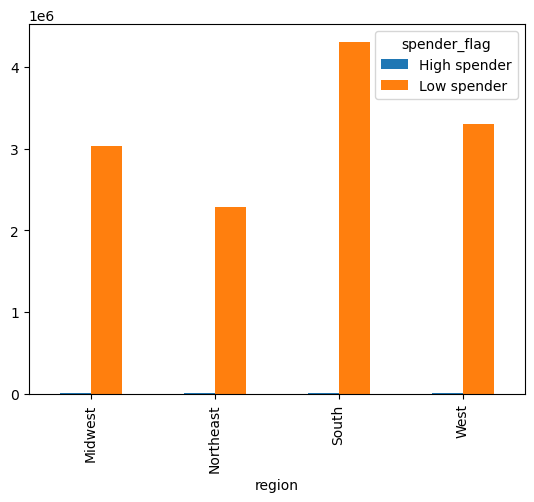

In [11]:
Bar3 = crosstab_region_spender.plot(kind = 'bar')

Bar3.figure.savefig(os.path.join(path, '04_Analysis', 'Visualizations', 'spender_by_region.png'), bbox_inches = 'tight')

## 3. Excluding low-activity customers from data

In [12]:
df[('max_order')].value_counts()

max_order
99    468667
6     324331
9     324004
8     323906
7     321751
       ...  
97     17990
98     17734
96     16214
1          3
2          1
Name: count, Length: 99, dtype: int64

In [13]:
#Creating exclusion flag column

df.loc[df['max_order']<5, 'activity_flag']='low'
df.loc[df['max_order']>=5, 'activity_flag']='high'

In [14]:
#Creating dataframe with low activity customers

df_low_activity = df[df['activity_flag'] =='low']

In [15]:
#Creating dataframe with high activity customers

df_active = df[df['activity_flag'] =='high']

In [16]:
# Checking dataframe

df_low_activity[('max_order')].value_counts()

max_order
4    301756
3    274515
1         3
2         1
Name: count, dtype: int64

#### Exporting the data with low activity customers

In [17]:
#Exporting df_low

df_low_activity.to_pickle(os.path.join(path, '02_Data', '2-2_Prepared', 'low_activity_customers.pkl'))

## 4. Customers profiling

### I tried here to find a balanced distribution of the group sizes in oerd

### 4.1. Having a look on the dataset

In [18]:
df_active.shape

(12385384, 20)

In [19]:
df_active.columns

Index(['order_id', 'user_id', 'orders_day_of_week', 'order_hour_of_day',
       'days_since_prior_order', 'department_id', 'prices', 'max_order',
       'loyalty_flag', 'mean_price', 'spender_flag', 'frequency_customer',
       'frequent_flag', 'state', 'age', 'n_dependants', 'fam_status', 'income',
       'region', 'activity_flag'],
      dtype='object')

In [20]:
df_active.describe()

,order_id,user_id,orders_day_of_week,order_hour_of_day,days_since_prior_order,department_id,prices,max_order,mean_price,frequency_customer,age,n_dependants,income
count,1.238538e+07,1.238538e+07,1.238538e+07,1.238538e+07,1.172102e+07,1.238538e+07,1.238538e+07,1.238538e+07,1.238538e+07,1.238538e+07,1.238538e+07,1.238538e+07,1.238538e+07
mean,1.710278e+06,1.029403e+05,2.740970e+00,1.341091e+01,1.080926e+01,9.921808e+00,7.789681e+00,3.442468e+01,7.789760e+00,9.956719e+00,4.946486e+01,1.502139e+00,9.967075e+04
std,9.873406e+05,5.947678e+04,2.089321e+00,4.248788e+00,8.578337e+00,6.282772e+00,4.240327e+00,2.489363e+01,7.218907e-01,6.666399e+00,1.848398e+01,1.118804e+00,4.314851e+04
min,2.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,5.000000e+00,1.000000e+00,0.000000e+00,1.800000e+01,0.000000e+00,2.590300e+04
25%,8.555838e+05,5.141100e+04,1.000000e+00,1.000000e+01,5.000000e+00,4.000000e+00,4.200000e+00,1.400000e+01,7.384178e+00,6.000000e+00,3.300000e+01,1.000000e+00,6.729800e+04
50%,1.710408e+06,1.026010e+05,3.000000e+00,1.300000e+01,7.000000e+00,9.000000e+00,7.400000e+00,2.800000e+01,7.811449e+00,7.000000e+00,4.900000e+01,2.000000e+00,9.675600e+04
75%,2.565104e+06,1.544110e+05,5.000000e+00,1.600000e+01,1.400000e+01,1.600000e+01,1.120000e+01,4.800000e+01,8.223473e+00,1.250000e+01,6.500000e+01,3.000000e+00,1.281010e+05
max,3.421083e+06,2.062090e+05,6.000000e+00,2.300000e+01,3.000000e+01,2.100000e+01,2.500000e+01,9.900000e+01,2.011429e+01,3.000000e+01,8.100000e+01,3.000000e+00,5.939010e+05


### 4.2. Distribution by age

<Axes: ylabel='Frequency'>

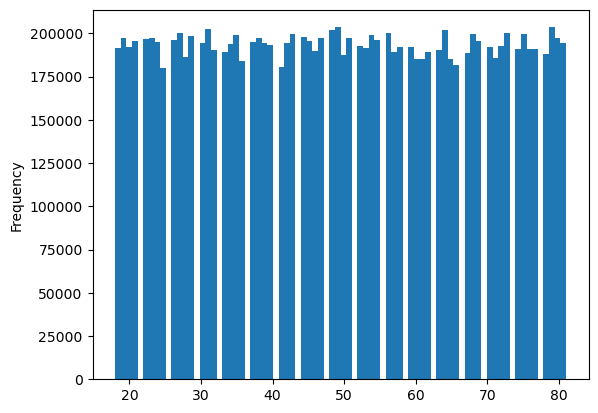

In [21]:
df_active[('age')].plot.hist(bins=80)

In [22]:
df_active.loc[df_active['age'] <= 35, 'age_group'] = 'Young Adult'

C:\Users\Marc\AppData\Local\Temp\ipykernel_11240\1695732397.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_active.loc[df_active['age'] <= 35, 'age_group'] = 'Young Adult'


In [23]:
df_active.loc[(df_active['age'] > 35) & (df_active['age'] < 60), 'age_group'] = 'Adult'

In [24]:
df_active.loc[df_active['age'] >= 60, 'age_group'] = 'Senior'

In [25]:
df_active['age_group'].value_counts(dropna = False)

age_group
Adult          4661181
Senior         4227767
Young Adult    3496436
Name: count, dtype: int64

### 4.3. Distribution by number of dependants - Household

#### I will assume here two groups: small household with zero or one dependent and medium household with 2 or 3 dependents

In [26]:
df_active[('n_dependants')].value_counts()

n_dependants
3    3109157
2    3095102
0    3094235
1    3086890
Name: count, dtype: int64

In [27]:
df_active.loc[df_active['n_dependants'] <= 1, 'household_size'] = 'Small'

C:\Users\Marc\AppData\Local\Temp\ipykernel_11240\2782542251.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_active.loc[df_active['n_dependants'] <= 1, 'household_size'] = 'Small'


In [28]:
df_active.loc[df_active['n_dependants'] >= 2, 'household_size'] = 'Middle'

In [29]:
df_active['household_size'].value_counts(dropna = False)

household_size
Middle    6204259
Small     6181125
Name: count, dtype: int64

### 4.4. Distribution by Income

<Axes: ylabel='Frequency'>

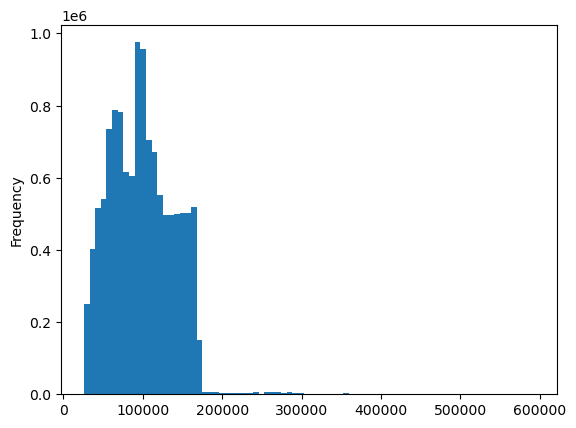

In [30]:
df_active[('income')].plot.hist(bins=80)

In [31]:
df_active.loc[df_active['income'] <= 80000, 'income_group'] = 'Low'

C:\Users\Marc\AppData\Local\Temp\ipykernel_11240\3267041156.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_active.loc[df_active['income'] <= 80000, 'income_group'] = 'Low'


In [32]:
df_active.loc[(df_active['income'] > 80000) & (df_active['income'] < 120000), 'income_group'] = 'Middle'

In [33]:
df_active.loc[df_active['income'] >= 120000, 'income_group'] = 'High'

In [34]:
df_active['income_group'].value_counts(dropna = False)

income_group
Low       4397793
Middle    4316331
High      3671260
Name: count, dtype: int64

# 5. Visualizations

In [35]:
# Import visualisation libraries
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

## 5.1. Creating an user_profile dataframe

In [36]:
# Start creating unique user_id sample and take relevant columns

user_profile = df_active[['user_id', 'region', 'loyalty_flag', 'spender_flag', 'frequent_flag', 'age_group', 'income_group', 'household_size']]

In [37]:
# Removing duplicate rows in the user_sample to obtain only one entry of all unique customers

user_profile = user_profile.drop_duplicates()

In [38]:
# Checking dataframe
user_profile

,user_id,region,loyalty_flag,spender_flag,frequent_flag,age_group,income_group,household_size
0,1,South,New customer,Low spender,Non-frequent customer,Young Adult,Low,Middle
60,2,West,Regular customer,Low spender,Regular customer,Senior,Low,Middle
258,3,West,Regular customer,Low spender,Frequent customer,Young Adult,Middle,Middle
343,4,South,Regular customer,Low spender,Frequent customer,Young Adult,Low,Middle
412,7,Northeast,Regular customer,Low spender,Frequent customer,Adult,Middle,Middle
...,...,...,...,...,...,...,...,...
32403343,206203,South,New customer,Low spender,Non-frequent customer,Senior,Middle,Middle
32403545,206206,West,Loyal customer,Low spender,Frequent customer,Young Adult,Low,Middle
32403830,206207,Midwest,Regular customer,Low spender,Regular customer,Senior,Middle,Small
32404053,206208,Midwest,Loyal customer,Low spender,Frequent customer,Senior,High,Small


## 5.2. Age distribution

In [39]:
# First, creating a table of age_group counts

age_group_table = df_active['age_group'].value_counts()

In [40]:
age_group_table

age_group
Adult          4661181
Senior         4227767
Young Adult    3496436
Name: count, dtype: int64

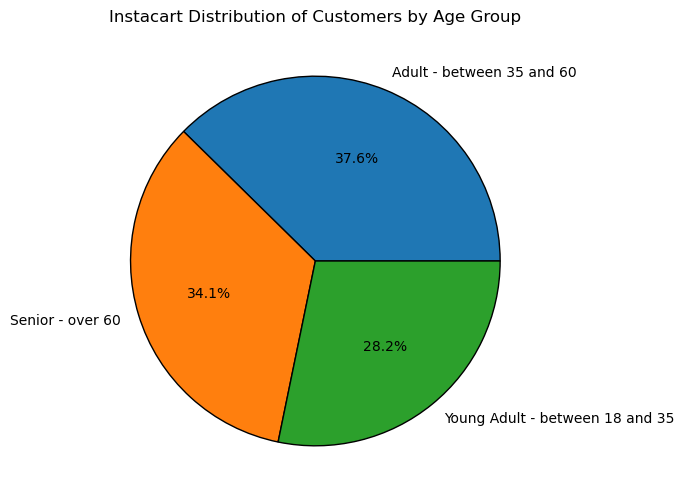

In [41]:
# Creating pie chart

plt.figure(figsize=(6, 6)) # Control size of chart
plt.pie(age_group_table, 
        #labels = age_group_table.index, 
        labels = ('Adult - between 35 and 60', 'Senior - over 60', 'Young Adult - between 18 and 35'),
        autopct='%.1f%%', # Show percentage to 1 d.p
        wedgeprops = {'edgecolor' : 'black'}) # boarders
plt.title('Instacart Distribution of Customers by Age Group') # title
plt.savefig(os.path.join(path, '04_Analysis', 'Visualizations', 'customers_age_groups_pie.png'), bbox_inches = 'tight') # Save
plt.show()

## 5.3. Income distribution

In [42]:
# First, creating a table of age_group counts

income_group_table = df_active['income_group'].value_counts()

In [43]:
income_group_table

income_group
Low       4397793
Middle    4316331
High      3671260
Name: count, dtype: int64

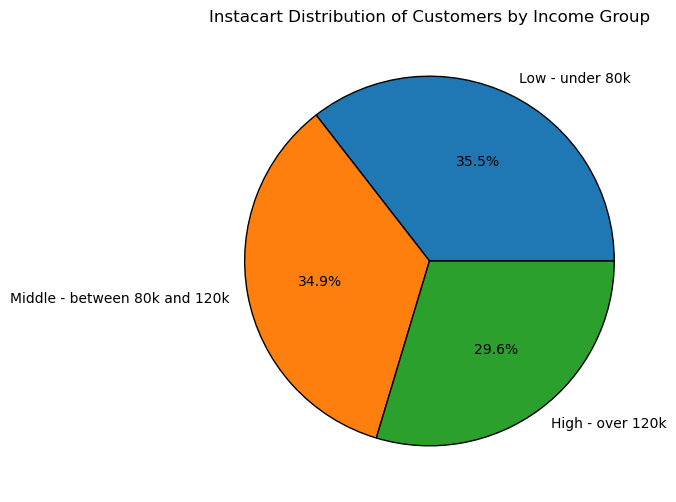

In [44]:
# Creating pie chart

plt.figure(figsize=(6, 6)) # Control size of chart
plt.pie(income_group_table, 
        #labels = income_group_table.index, 
        labels = ('Low - under 80k', 'Middle - between 80k and 120k', 'High - over 120k'),
        autopct='%.1f%%', # Show percentage to 1 d.p
        wedgeprops = {'edgecolor' : 'black'}) # boarders
plt.title('Instacart Distribution of Customers by Income Group') # title
# plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'customers_age_groups_pie.png'), bbox_inches = 'tight') # Save
plt.show()

## 5.4. Household size distribution

In [45]:
# First, creating a table of age_group counts

household_size_table = df_active['household_size'].value_counts()

In [46]:
household_size_table

household_size
Middle    6204259
Small     6181125
Name: count, dtype: int64

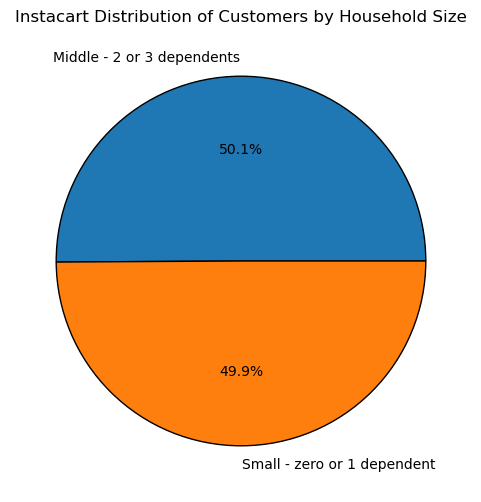

In [47]:
# Creating pie chart

plt.figure(figsize=(6, 6)) # Control size of chart
plt.pie(household_size_table, 
        #labels = household_size_table.index, 
        labels = ('Middle - 2 or 3 dependents', 'Small - zero or 1 dependent'),
        autopct='%.1f%%', # Show percentage to 1 d.p
        wedgeprops = {'edgecolor' : 'black'}) # boarders
plt.title('Instacart Distribution of Customers by Household Size') # title
# plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'customers_age_groups_pie.png'), bbox_inches = 'tight') # Save
plt.show()

# 6. Aggregation 

### Aggregate the max, mean, and min variables on a customer-profile level for usage frequency and expenditure.

In [48]:
# Create aggregated subset of data where the 'prices' column is the total cost of each order:
orders_profile = df_active.groupby(['user_id', 'age_group', 'income_group', 'household_size', 'frequent_flag', 
                                    'region', 'days_since_prior_order'])['prices'].sum().reset_index()

In [49]:
# Checking the subset
orders_profile

,user_id,age_group,income_group,household_size,frequent_flag,region,days_since_prior_order,prices
0,1,Young Adult,Low,Middle,Non-frequent customer,South,0.0,13.0
1,1,Young Adult,Low,Middle,Non-frequent customer,South,14.0,31.0
2,1,Young Adult,Low,Middle,Non-frequent customer,South,15.0,7.0
3,1,Young Adult,Low,Middle,Non-frequent customer,South,19.0,3.0
4,1,Young Adult,Low,Middle,Non-frequent customer,South,20.0,4.0
...,...,...,...,...,...,...,...,...
1314730,206209,Senior,High,Middle,Non-frequent customer,Midwest,9.0,29.2
1314731,206209,Senior,High,Middle,Non-frequent customer,Midwest,18.0,28.5
1314732,206209,Senior,High,Middle,Non-frequent customer,Midwest,22.0,32.8
1314733,206209,Senior,High,Middle,Non-frequent customer,Midwest,29.0,30.1


## 6.1. Aggregation by age group

In [50]:
# Creating crosstab using region and spender_flag

crosstab_age_frequency = pd.crosstab(df_active['age_group'], df_active['frequent_flag'], dropna = False)

In [51]:
crosstab_age_frequency

frequent_flag,Frequent customer,Non-frequent customer,Regular customer
age_group,,,
Adult,3191881,435633,1033667
Senior,2900319,396412,931036
Young Adult,2390354,325763,780319


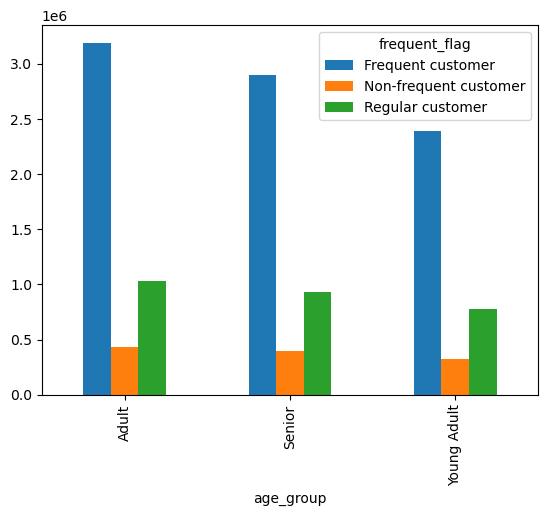

In [52]:
Bar4 = crosstab_age_frequency.plot(kind = 'bar')

Bar4.figure.savefig(os.path.join(path, '04_Analysis', 'Visualizations', 'frequency_by_age.png'), bbox_inches = 'tight')

In [53]:
# Calculating max, min, mean by age category
aggregations_age = orders_profile.groupby('age_group').agg({'days_since_prior_order' : ['min', 'mean', 'max'], 
                                                                  'prices' : ['min', 'mean', 'max']})
# Checking aggregation results
aggregations_age

days_since_prior_order                  prices                   
                               min       mean   max    min       mean     max
age_group                                                                    
Adult                          0.0  12.582512  30.0    1.0  69.479065  4714.8
Senior                         0.0  12.580418  30.0    1.0  69.219253  5011.9
Young Adult                    0.0  12.591735  30.0    1.0  69.688106  3418.2

## 6.2. Aggregation by Income Group

In [54]:
# max, min, mean by age category
aggregations_income = orders_profile.groupby('income_group').agg({'days_since_prior_order' : ['min', 'mean', 'max'],
                                                                        'prices' : ['min', 'mean', 'max']})
# Checking aggregation results
aggregations_income 

days_since_prior_order                  prices                   
                                min       mean   max    min       mean     max
income_group                                                                  
High                            0.0  12.502352  30.0    1.0  73.647276  5011.9
Low                             0.0  12.704108  30.0    1.0  62.461060  4714.8
Middle                          0.0  12.518693  30.0    1.0  73.785273  4713.0

In [55]:
aggregations_income.columns


MultiIndex([('days_since_prior_order',  'min'),
            ('days_since_prior_order', 'mean'),
            ('days_since_prior_order',  'max'),
            (                'prices',  'min'),
            (                'prices', 'mean'),
            (                'prices',  'max')],
           )

## 6.3. Aggregation by Household size

In [56]:
# max, min, mean by age category
aggregations_household = orders_profile.groupby('household_size').agg({'days_since_prior_order' : ['min', 'mean', 'max'],
                                                                        'prices' : ['min', 'mean', 'max']})
# Checking aggregation results
aggregations_household

days_since_prior_order                  prices             \
                                  min       mean   max    min       mean   
household_size                                                             
Middle                            0.0  12.585756  30.0    1.0  69.501292   
Small                             0.0  12.583017  30.0    1.0  69.396227   

                        
                   max  
household_size          
Middle          4714.8  
Small           5011.9

## 7. Comparison between departments

### 7.1. Creating a dataframe with a departments column

In [57]:
#Importing departments dataframe

df_dept=pd.read_csv(os.path.join(path,path, '02_Data','2-2_Prepared', 'departments_wrangled.csv'))

In [58]:
#Checking Departments Dataframe
df_dept

,Unnamed: 0,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


In [59]:
#Renaming unnamed column to department_id
df_dept.rename(columns = {'Unnamed: 0' : 'department_id'}, inplace = True)

In [60]:
df_dept.head(2)

,department_id,department
0,1,frozen
1,2,other


#### Merging the department dataframe with the df_active on department_id

In [61]:
#Checking dataframe
df_active_dep = df_active.merge(df_dept, on = 'department_id', indicator = 'merge1')

In [62]:
df_active_dep.head(10)

,order_id,user_id,orders_day_of_week,order_hour_of_day,days_since_prior_order,department_id,prices,max_order,loyalty_flag,mean_price,...,n_dependants,fam_status,income,region,activity_flag,age_group,household_size,income_group,department,merge1
0,2539329,1,2,8,NaN,7,9.0,10,New customer,6.367797,...,3,married,40423,South,high,Young Adult,Middle,Low,beverages,both
1,2539329,1,2,8,NaN,19,4.4,10,New customer,6.367797,...,3,married,40423,South,high,Young Adult,Middle,Low,snacks,both
2,2539329,1,2,8,NaN,19,4.7,10,New customer,6.367797,...,3,married,40423,South,high,Young Adult,Middle,Low,snacks,both
3,2539329,1,2,8,NaN,17,1.0,10,New customer,6.367797,...,3,married,40423,South,high,Young Adult,Middle,Low,household,both
4,2398795,1,3,7,15.0,19,3.0,10,New customer,6.367797,...,3,married,40423,South,high,Young Adult,Middle,Low,snacks,both
5,2398795,1,3,7,15.0,14,4.0,10,New customer,6.367797,...,3,married,40423,South,high,Young Adult,Middle,Low,breakfast,both
6,473747,1,3,12,21.0,19,4.4,10,New customer,6.367797,...,3,married,40423,South,high,Young Adult,Middle,Low,snacks,both
7,473747,1,3,12,21.0,19,3.0,10,New customer,6.367797,...,3,married,40423,South,high,Young Adult,Middle,Low,snacks,both
8,2254736,1,4,7,29.0,16,8.6,10,New customer,6.367797,...,3,married,40423,South,high,Young Adult,Middle,Low,dairy eggs,both
9,431534,1,4,15,28.0,7,9.0,10,New customer,6.367797,...,3,married,40423,South,high,Young Adult,Middle,Low,beverages,both


In [63]:
df_active_dep.dtypes

order_id                     int64
user_id                      int64
orders_day_of_week           int64
order_hour_of_day            int64
days_since_prior_order     float64
department_id                int64
prices                     float64
max_order                    int64
loyalty_flag                object
mean_price                 float64
spender_flag                object
frequency_customer         float64
frequent_flag               object
state                       object
age                          int64
n_dependants                 int64
fam_status                  object
income                       int64
region                      object
activity_flag               object
age_group                   object
household_size              object
income_group                object
department                  object
merge1                    category
dtype: object

In [64]:
# check the distribution of the departments

df_active_dep['department'].value_counts()

department
produce            3631549
dairy eggs         2070536
snacks             1105797
beverages          1027086
frozen              849358
pantry              712871
bakery              448698
canned goods        404854
deli                401834
dry goods pasta     328615
household           279941
meat seafood        269980
breakfast           268843
personal care       169975
babies              164381
international       103037
alcohol              57625
pets                 37270
missing              25888
other                13834
bulk                 13412
Name: count, dtype: int64

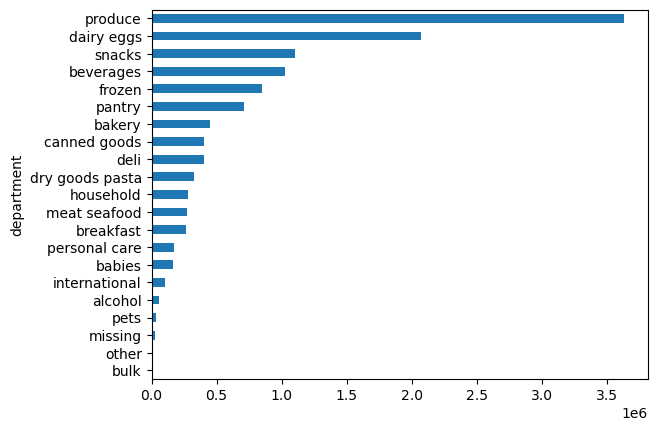

In [65]:
Bar =df_active_dep.department.value_counts().sort_values().plot(kind = 'barh')

In [66]:
# Exporting bar chart

Bar.figure.savefig(os.path.join(path, '04_Analysis', 'Visualizations', 'Bar_department.png'))

### 7.2. Income vs. Departments

In [67]:
# Create aggregated subset of data where the 'prices' column is the total cost of each order:
grouped_dep_inc = df_active_dep.groupby(['income_group', 'department']).size().reset_index(name='counts')

# Sorting to have 'high to low'
grouped_dep_inc.sort_values(by=['income_group', 'counts'], ascending=False, inplace=True)

grouped_dep_inc.head()

,income_group,department,counts
61,Middle,produce,1300470
49,Middle,dairy eggs,734033
45,Middle,beverages,337916
62,Middle,snacks,334157
52,Middle,frozen,298690


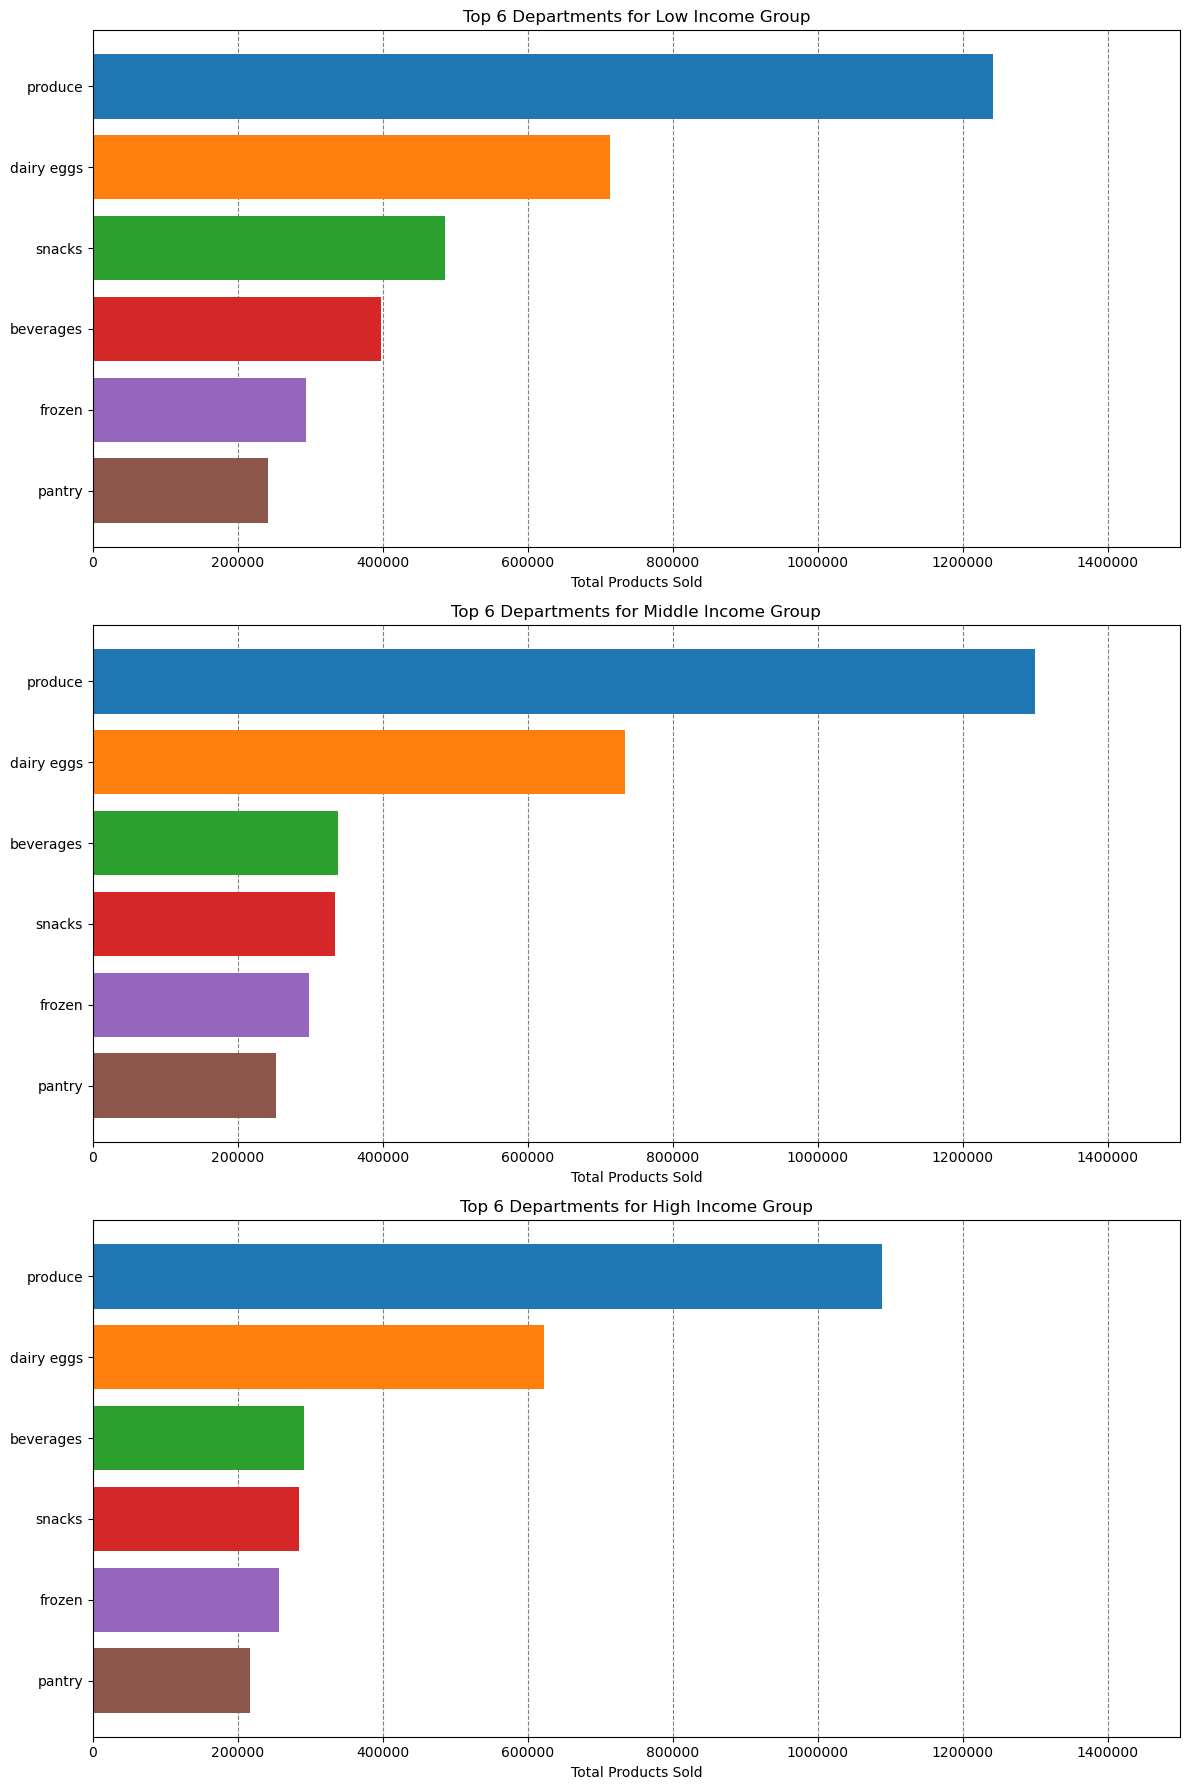

In [68]:
# Create subplots and color scheme
fig, axs = plt.subplots(3, 1, figsize=(12, 18))

# Define the desired order and colors
desired_order = ['Low', 'Middle', 'High']
colors = plt.cm.tab10(np.linspace(0, 1, 10))  # Sets color palette

# Iterate over each income group and create a horizontal bar chart
for i, income_group in enumerate(desired_order):
    income_data = grouped_dep_inc[grouped_dep_inc['income_group'] == income_group].head(6)
    ax = axs[i]
    ax.barh(income_data['department'], income_data['counts'], color=colors, zorder=2)
    ax.set_title(f'Top 6 Departments for {income_group} Income Group')
    ax.set_xlabel('Total Products Sold')
    ax.set_xlim(0, 1500000) # Keep x-axis range consistent for comparisons
    ax.ticklabel_format(style='plain', axis='x')
    ax.set_ylabel('')
    ax.invert_yaxis()  # Invert y-axis to have the highest count at the top
    ax.grid(axis='x', color='gray', linestyle='dashed')

plt.tight_layout()  # Adjust layout to prevent overlapping
plt.savefig(os.path.join(path, '04_Analysis', 'Visualizations', 'departments_by_income.png'), bbox_inches = 'tight')
plt.show()

### 7.3. Age vs. Departments

In [69]:
# Create aggregated subset of data where the 'prices' column is the total cost of each order:
grouped_dep_age = df_active_dep.groupby(['age_group', 'department']).size().reset_index(name='counts')

# Sorting to have 'high to low'
grouped_dep_age.sort_values(by=['age_group', 'counts'], ascending=False, inplace=True)

grouped_dep_age.head()

,age_group,department,counts
61,Young Adult,produce,1023007
49,Young Adult,dairy eggs,589305
62,Young Adult,snacks,313681
45,Young Adult,beverages,286585
52,Young Adult,frozen,238841


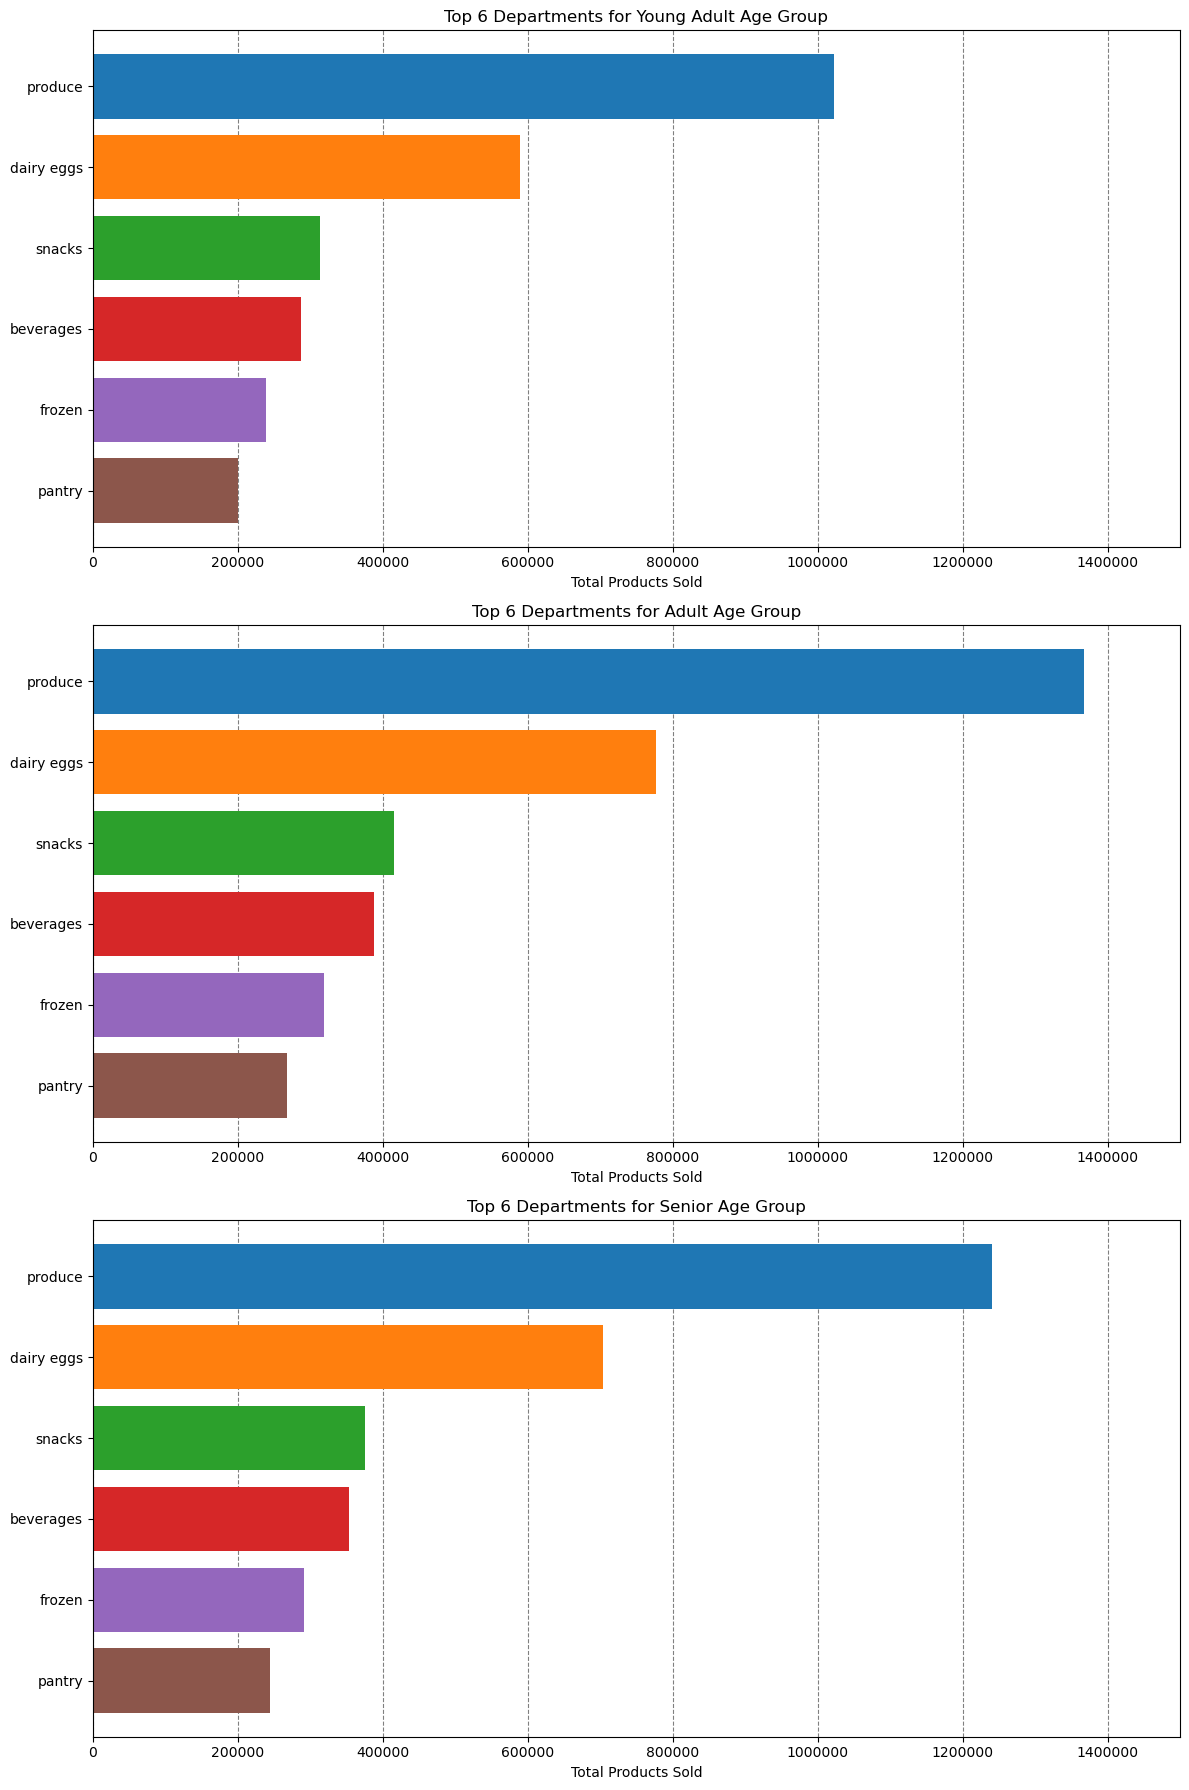

In [70]:
# Create subplots and color scheme
fig, axs = plt.subplots(3, 1, figsize=(12, 18))

# Define the desired order and colors
desired_order = ['Young Adult', 'Adult', 'Senior']
colors = plt.cm.tab10(np.linspace(0, 1, 10))  # Sets color palette

# Iterate over each income group and create a horizontal bar chart
for i, age_group in enumerate(desired_order):
    age_data = grouped_dep_age[grouped_dep_age['age_group'] == age_group].head(6)
    ax = axs[i]
    ax.barh(age_data['department'], age_data['counts'], color=colors, zorder=2)
    ax.set_title(f'Top 6 Departments for {age_group} Age Group')
    ax.set_xlabel('Total Products Sold')
    ax.set_xlim(0, 1500000) # Keep x-axis range consistent for comparisons
    ax.ticklabel_format(style='plain', axis='x')
    ax.set_ylabel('')
    ax.invert_yaxis()  # Invert y-axis to have the highest count at the top
    ax.grid(axis='x', color='gray', linestyle='dashed')

plt.tight_layout()  # Adjust layout to prevent overlapping
plt.savefig(os.path.join(path, '04_Analysis', 'Visualizations', 'departments_by_age.png'), bbox_inches = 'tight')
plt.show()

### 7.4. Household vs. Departments

In [71]:
# Create aggregated subset of data where the 'prices' column is the total cost of each order:
grouped_dep_hous = df_active_dep.groupby(['household_size', 'department']).size().reset_index(name='counts')

# Sorting to have 'high to low'
grouped_dep_hous.sort_values(by=['household_size', 'counts'], ascending=False, inplace=True)

grouped_dep_hous.head()

,household_size,department,counts
40,Small,produce,1812403
28,Small,dairy eggs,1035383
41,Small,snacks,551132
24,Small,beverages,512355
31,Small,frozen,423405


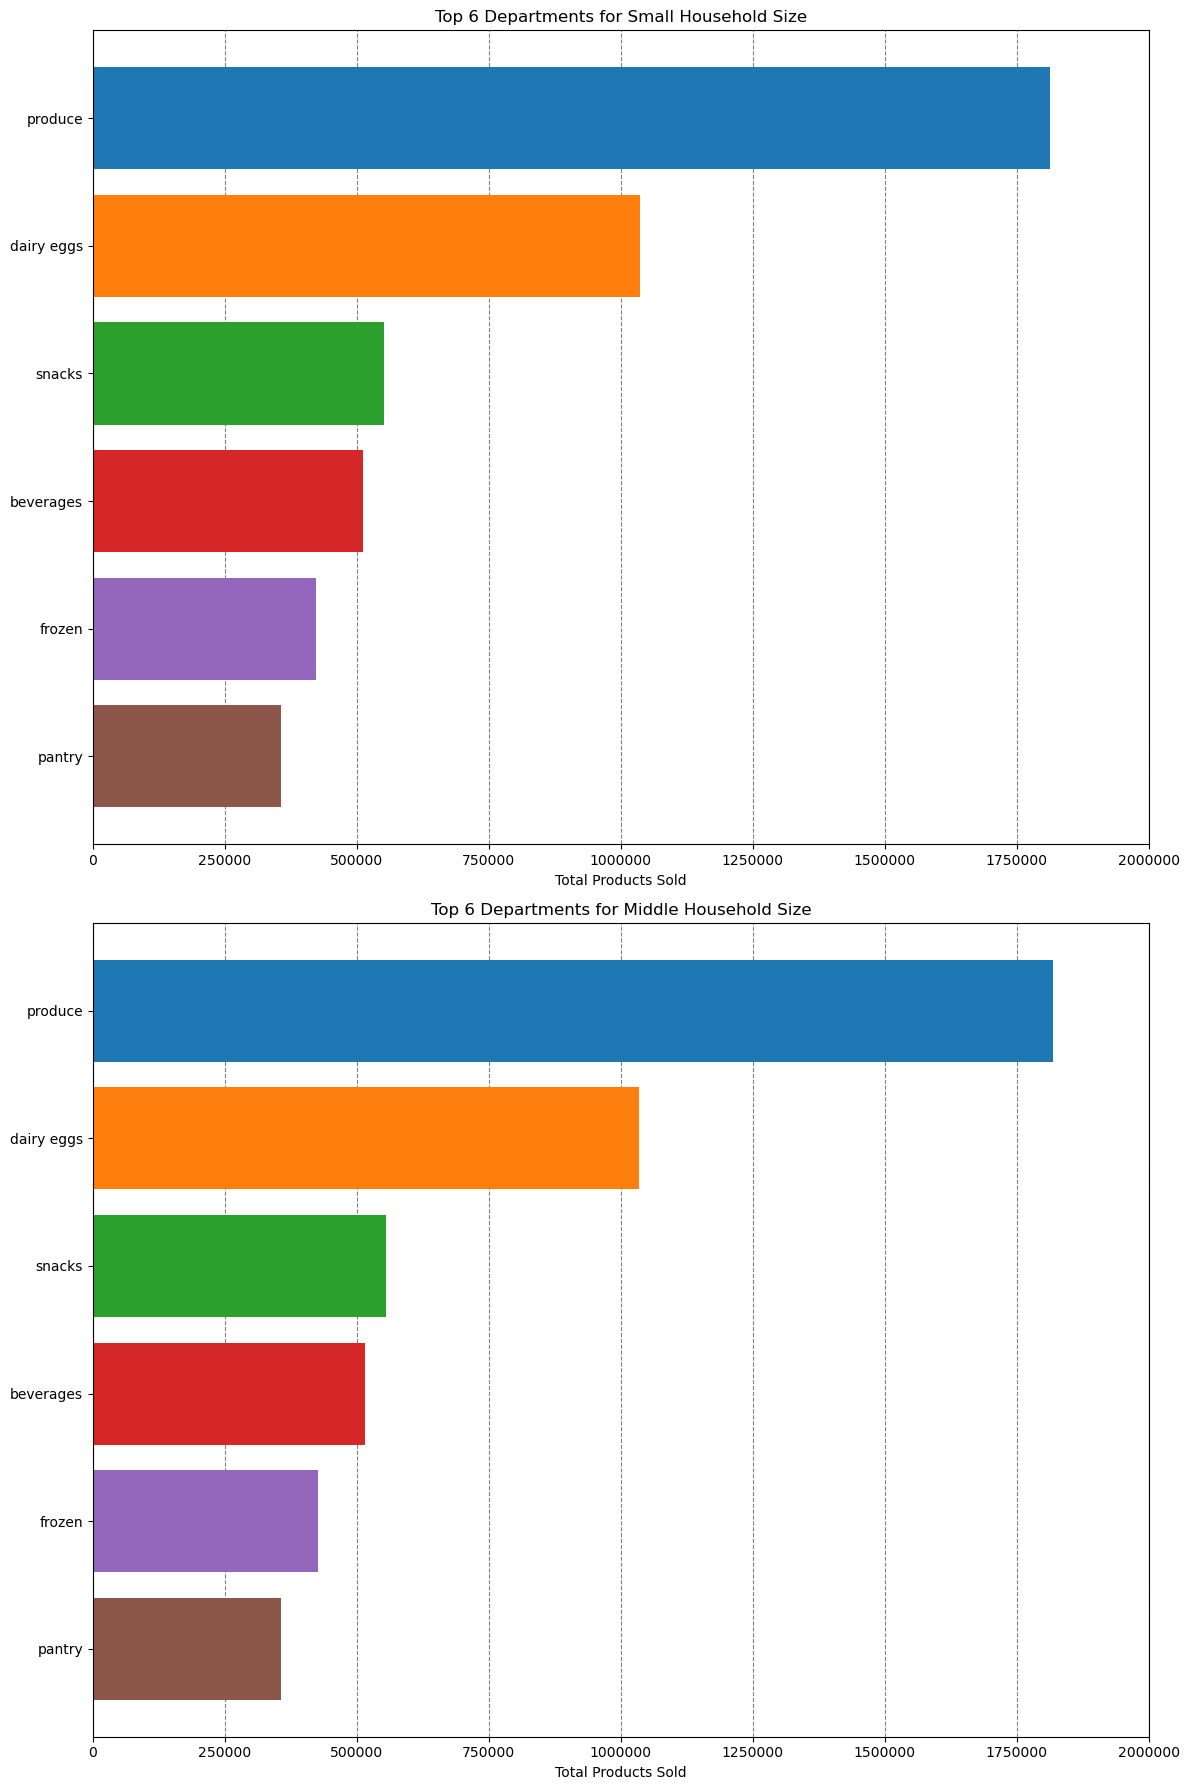

In [72]:
# Create subplots and color scheme
fig, axs = plt.subplots(2, 1, figsize=(12, 18))

# Define the desired order and colors
desired_order = ['Small', 'Middle']
colors = plt.cm.tab10(np.linspace(0, 1, 10))  # Sets color palette

# Iterate over each income group and create a horizontal bar chart
for i, household_size in enumerate(desired_order):
    hous_data = grouped_dep_hous[grouped_dep_hous['household_size'] == household_size].head(6)
    ax = axs[i]
    ax.barh(hous_data['department'], hous_data['counts'], color=colors, zorder=2)
    ax.set_title(f'Top 6 Departments for {household_size} Household Size')
    ax.set_xlabel('Total Products Sold')
    ax.set_xlim(0, 2000000) # Keep x-axis range consistent for comparisons
    ax.ticklabel_format(style='plain', axis='x')
    ax.set_ylabel('')
    ax.invert_yaxis()  # Invert y-axis to have the highest count at the top
    ax.grid(axis='x', color='gray', linestyle='dashed')

plt.tight_layout()  # Adjust layout to prevent overlapping
plt.savefig(os.path.join(path, '04_Analysis', 'Visualizations', 'departments_by_household.png'), bbox_inches = 'tight')
plt.show()

## 8. Comparison between regions

### 8.1. Income Groups vs Region

C:\Users\Marc\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Marc\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\Marc\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\Marc\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-

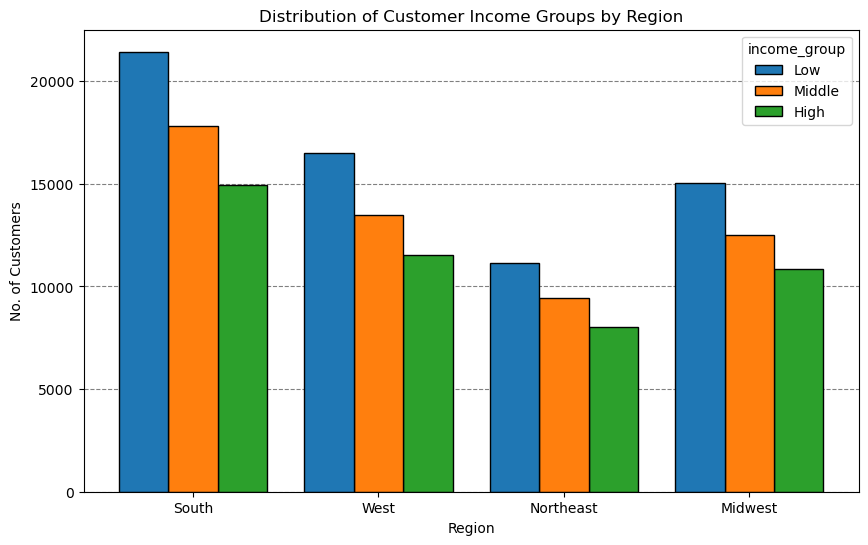

In [73]:
# A histogram could work to show the count of customers in each income group by region
plt.figure(figsize=(10, 6))

# Plot the histogram bars
sns.histplot(data=user_profile, x=('region'), hue=('income_group'), multiple=('dodge'), shrink=.8, alpha=1)

# Overlay a grid behind the bars
plt.gca().set_axisbelow(True)  # Ensure grid is behind bars
plt.grid(axis=('y'), color='gray', linestyle='dashed')

# General formatting
plt.title('Distribution of Customer Income Groups by Region')
plt.ylabel('No. of Customers')
plt.xlabel('Region')

# Save and show
plt.savefig(os.path.join(path, '04_Analysis', 'Visualizations', 'income_by_region.png'), bbox_inches = 'tight')
plt.show()

### 8.2. Age Groups vs Region

C:\Users\Marc\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Marc\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\Marc\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\Marc\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-

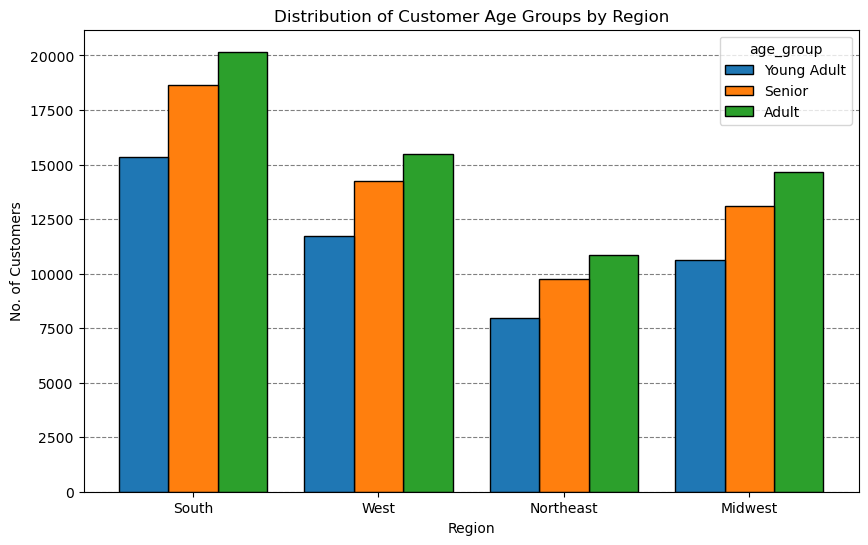

In [74]:
# A histogram could work to show the count of customers in each income group by region
plt.figure(figsize=(10, 6))

# Plot the histogram bars
sns.histplot(data=user_profile, x=('region'), hue=('age_group'), multiple=('dodge'), shrink=.8, alpha=1)

# Overlay a grid behind the bars
plt.gca().set_axisbelow(True)  # Ensure grid is behind bars
plt.grid(axis=('y'), color=('gray'), linestyle=('dashed'))

# General formatting
plt.title('Distribution of Customer Age Groups by Region')
plt.ylabel('No. of Customers')
plt.xlabel('Region')

# Save and show
plt.savefig(os.path.join(path, '04_Analysis', 'Visualizations', 'age_by_region.png'), bbox_inches = 'tight')
plt.show()

### 8.3. Household size vs Region

C:\Users\Marc\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Marc\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\Marc\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\Marc\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-

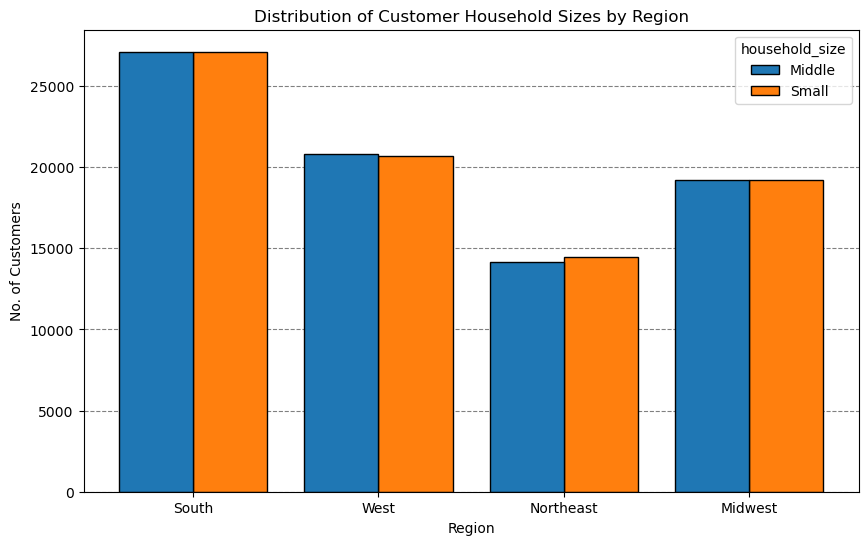

In [75]:
# A histogram could work to show the count of customers in each income group by region
plt.figure(figsize=(10, 6))

# Plot the histogram bars
sns.histplot(data=user_profile, x=('region'), hue=('household_size'), multiple=('dodge'), shrink=.8, alpha=1)

# Overlay a grid behind the bars
plt.gca().set_axisbelow(True)  # Ensure grid is behind bars
plt.grid(axis=('y'), color=('gray'), linestyle=('dashed'))

# General formatting
plt.title('Distribution of Customer Household Sizes by Region')
plt.ylabel('No. of Customers')
plt.xlabel('Region')

# Save and show
plt.savefig(os.path.join(path, '04_Analysis', 'Visualizations', 'household-size_by_region.png'), bbox_inches = 'tight')
plt.show()

### 9. Extra Visualizations for the Excel report 

In [76]:
df_active.columns

Index(['order_id', 'user_id', 'orders_day_of_week', 'order_hour_of_day',
       'days_since_prior_order', 'department_id', 'prices', 'max_order',
       'loyalty_flag', 'mean_price', 'spender_flag', 'frequency_customer',
       'frequent_flag', 'state', 'age', 'n_dependants', 'fam_status', 'income',
       'region', 'activity_flag', 'age_group', 'household_size',
       'income_group'],
      dtype='object')

#### What’s the distribution among users in regards to their brand loyalty?

In [77]:
loyalty_table = df_active['loyalty_flag'].value_counts()
loyalty_table

loyalty_flag
Regular customer    6351284
Loyal customer      4112662
New customer        1921438
Name: count, dtype: int64

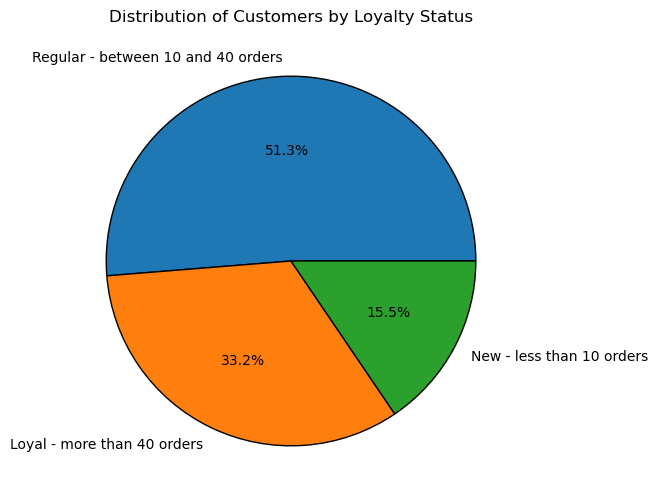

In [78]:
plt.figure(figsize=(6, 6)) # Control size of chart
plt.pie(loyalty_table, 
        #labels = income_group_table.index, 
        labels = ('Regular - between 10 and 40 orders', 'Loyal - more than 40 orders', 'New - less than 10 orders'),
        autopct='%.1f%%', # Show percentage to 1 d.p
        wedgeprops = {'edgecolor' : 'black'}) # boarders
plt.title('Distribution of Customers by Loyalty Status') # title
plt.savefig(os.path.join(path, '04_Analysis', 'Visualizations', 'customers_loyalty_pie.png'), bbox_inches = 'tight') # Save
plt.show()

#### Are there differences in ordering habits based on a customer’s loyalty status?

In [79]:
agg_loyalty = df_active.groupby('loyalty_flag').agg({'days_since_prior_order' : ['mean']})

agg_loyalty

,days_since_prior_order
,mean
loyalty_flag,
Loyal customer,6.026687
New customer,17.604508
Regular customer,12.150871


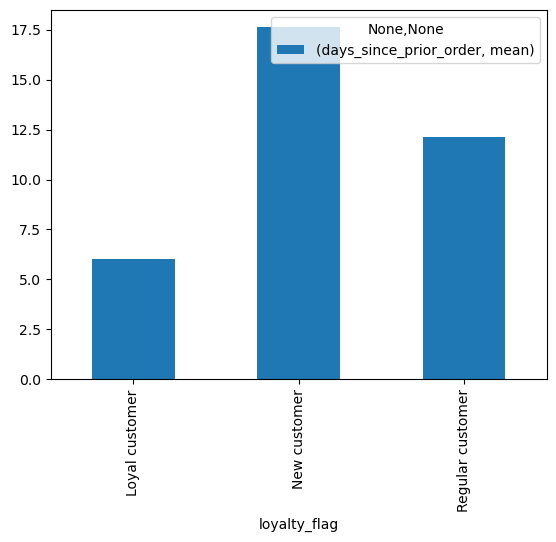

In [80]:
Bar = agg_loyalty.plot(kind = 'bar')

Bar.figure.savefig(os.path.join(path, '04_Analysis', 'Visualizations', 'frequency_by_loyalty.png'), bbox_inches = 'tight')